### Gentrification Distribution by Neighborhood.
The following code was done with the intention of adding an stacked bar chart when clicked on a neighborhood.
This barchart would show the percentage distribution of each gentrification category inside that neighborhood.
The percentages are constructed counting the number of census tract of each category and dividing by the total.

In [7]:
import altair as alt
import pandas as pd
%pylab inline

# This is to enable visualization rendering inside the notebook,
# similar to the inline instruction from matplotlib.
#alt.renderers.enable('default')
#alt.renderers.enable('notebook')
print(alt.__version__)
print(alt.renderers.active)

Populating the interactive namespace from numpy and matplotlib
2.0.0rc2
default


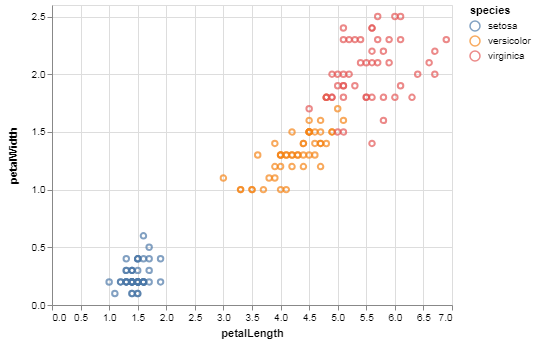

In [8]:
#Checking the rendering works correctly
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

Though everything can be put in a single call with Altair, in practice, it might be more readable to define complex components up front to make it easier to understand the pipeline. Below is an example.

In [17]:
#Reading data
gentribarrios  = "https://raw.githubusercontent.com/jif245/DataViz/master/Project/uac.geojson"
data = pd.read_json(gentribarrios)
#This dataset includes the count of census tract for each category inside a neighborhood

In [20]:
#Reshaping the json to a more friendly shape
df = data.features.apply(pd.Series)["properties"].apply(pd.Series)
df.head(2)

,conteo,gentri,neigh
0,7,LI - Not Losing Low Income Households,Airport
1,2,MHI - At Risk of Exclusion,Airport


In [19]:
#creating a list of neighborhoods names
barrios=df.neigh.unique()

In [27]:
#selecting a neighborhood to test the code below
bour=barrios[19]
print(bour)

Briarwood-Jamaica Hills


In [28]:
#this function creates the percentages based on the counts

def barriendo(bour):
    data = pd.read_csv(gentrineigh)
    data["percentage"]=data.groupby('neigh')['conteo'].apply(lambda x: x.astype(float)/x.sum())
    neigh_select=data[data.neigh==bour][["neigh","gentri","percentage"]]
    return neigh_select

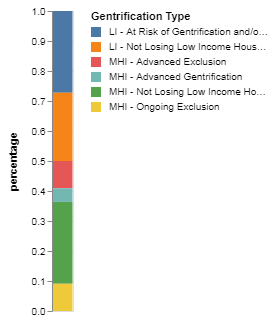

In [30]:
#This is the bar chart visualization
alt.Chart(barriendo(bour)).mark_bar().encode(
    alt.Color('gentri:N',
        legend=alt.Legend(title='Gentrification Type'),
    ),
    y="percentage:Q",
)